# Predict students' graduation rate

dataset 
- [from @ roycekimmons.com](http://roycekimmons.com/tools/generated_data/graduation_rate)

> This is a fictional dataset and should only be used for data science training purposes.
> 
> This data set includes graduation rates from a four-year college with a variety of student factors.

The key questions we want to address:

> 1. How effective are entrance requirements at predicting gpa and graduation rate?
> 1. What would be the best way to improve graduation rates?

> All data sets are generated on-the-fly. So, you can increase your n by downloading a data set multiple times and combining the files. (n=1000) per large sample download

Based on the above statement, I have downloaded 5x times and combined them into one csv file so that we can work with a larger sample size of 5000 observations, instead of just 1000 observations.

Target is `graduate_in_4years` 
- feature-engineered from 'years_to_graduate' as 
  - 0: 'Yes' ie 'years_to_graduate' < 5
  - 1: 'No' ie 'years_to_graduate' > 4 
- was set to 4 years initially until EDA reveals median is 5.


In [110]:
%reload_ext autoreload
%autoreload 2

%reload_ext dotenv
%dotenv

import sys
from pathlib import Path

# Set the path to the current file 
current_file_path = Path().resolve()
print(f'{current_file_path = } ')

# Set the path to the data folder
data_folder_path = current_file_path / 'data'
print(f'{data_folder_path = } ')

# Set the path to the src folder
src_folder_path = current_file_path / 'src'
print(f'{src_folder_path = } ')

# Add the src folder to the system path
sys.path.append(str(src_folder_path))

# Import modules from files under /src
from config import * 
from src.data_loader import CSVDataLoader
from src.data_preprocessor import Preprocessor
from src.data_feature_builder import FeatureBuilder

current_file_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms') 
data_folder_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms/data') 
src_folder_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms/src') 


## Import packages

In [111]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

import seaborn as sns
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

In [112]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mutual_info_score

### Domain area research

The SAT and ACT are standardized tests widely used for college admissions in the United States.

ACT: The average of a student's scores on the four ACT tests: English, mathematics, reading, and science. The score range for each of the four tests is 1-36. The composite score is reported as a whole number from 1 to 36, and is rounded to the nearest whole number.  

SAT : The SAT total score is the sum of the two section scores, Evidence-Based Reading and Writing, and Math. Each section is scored on a scale of 200 to 800, so the total score can range from 400 to 1600. 

GPA : answer from google bard to the question 'What is a passing GPA?'

> A passing GPA is the minimum GPA that a student must maintain in order to remain in good standing and graduate from college. The passing GPA varies from school to school, but it is typically between 2.0 and 2.5.
> 
> Some schools may have higher passing GPAs for certain programs or majors. For example, a student in an engineering program may need to maintain a GPA of at least 3.0 in order to graduate.
> 
> Students who fall below the passing GPA may be placed on academic probation. If they do not improve their grades, they may be suspended or expelled from school.
> 
> It is important to note that a passing GPA is not the same as a good GPA. Many colleges and universities use GPAs to determine admissions decisions, scholarships, and honors programs. A student who wants to be competitive in the college admissions process should aim for a GPA of at least 3.0.

### Data Dictionary

| **Column Name**       | **Description**                               | **Range** | **Data Type** |
|-----------------------|-----------------------------------------------|-----------|---------------|
| 'act_composite_score' | The average of English, Mathematics, Reading, and Science tests. (Numerical) | 1-36 | int |
| 'sat_total_score'     | Sum of Reading & Writing, and Mathematics. (Numerical) | 400 to 1600 | int |
| 'parental_level_of_education' |  For one parent. (Categorical)   | | |
| 'parental_income' | Income for one parent, per annum. (Numerical) | | int |
| 'high_school_gpa' | Grade point average upon graduating high school. (Numerical) | 2.0 to 4.0 | float |
| 'college_gpa' | `target` Grade point average upon graduating college. (Numerical) | 2.0 to 4.0| float |
| 'years_to_graduate' | Number of years to graduate college. (Numerical) | | int  |

## Ingest Data

In [113]:
import glob

concatenated = pd.DataFrame()

# Define the file extension
file_pattern = 'graduation*.csv'
print(file_pattern)

# Extract the list of files with the extension
file_list = glob.glob(file_pattern, root_dir=data_folder_path)

# Print the list of files
print(file_list)

graduation*.csv
['graduation_rate.csv', 'graduation_rate_0.csv', 'graduation_rate_1.csv', 'graduation_rate_2.csv', 'graduation_rate_3.csv', 'graduation_rate_4.csv']


In [114]:
DFs = []

for file in file_list:
    print(f'reading {file} ... ')
    df = CSVDataLoader().load(data_folder_path / file)
    # display(df.head(2))
    DFs.append(df)
    print()
    
data = pd.concat(DFs)
data.head(2)

output_file = data_folder_path / 'graduation_rate.csv'
print(output_file)
if output_file.exists():
   print(f'{output_file} exists, not overwritten.')
else:
   df.to_csv(output_file, index=False, header=True, mode='w')

reading graduation_rate.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 400.01it/s]


Finished processing the CSV file.

reading graduation_rate_0.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 496.22it/s]


Finished processing the CSV file.

reading graduation_rate_1.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 500.04it/s]


Finished processing the CSV file.

reading graduation_rate_2.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 399.95it/s]


Finished processing the CSV file.

reading graduation_rate_3.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 497.01it/s]


Finished processing the CSV file.

reading graduation_rate_4.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 399.91it/s]

Finished processing the CSV file.

B:\repos\Courses\DataTalksClub\mlzoomcamp-midterms\data\graduation_rate.csv
B:\repos\Courses\DataTalksClub\mlzoomcamp-midterms\data\graduation_rate.csv exists, not overwritten.


### column names

In [115]:
data.columns

Index(['ACT composite score', 'SAT total score', 'parental level of education',
       'parental income', 'high school gpa', 'college gpa',
       'years to graduate'],
      dtype='object')

Column names contain symbols and spaces, so we are going to tidy these up.

In [116]:
data = Preprocessor().ColumnsSymbolReplacer(data)

In [117]:
data = Preprocessor().SymbolReplacer(data, 'parental_level_of_education')

In [118]:
data.head(2).T

,0,1
act_composite_score,30,23
sat_total_score,2109,1800
parental_level_of_education,some college,some high school
parental_income,51851,53302
high_school_gpa,4.0,3.0
college_gpa,3.3,3.2
years_to_graduate,5,8


In [119]:
data.columns

Index(['act_composite_score', 'sat_total_score', 'parental_level_of_education',
       'parental_income', 'high_school_gpa', 'college_gpa',
       'years_to_graduate'],
      dtype='object')

In [121]:
numericals = data.select_dtypes(include=['int64','float64'])
categoricals = data.select_dtypes(exclude=['int64','float64'])
print(f'{numericals.columns = } ')
print(f'{categoricals.columns = } ')

numericals.columns = Index(['act_composite_score', 'sat_total_score', 'parental_income',
       'high_school_gpa', 'college_gpa', 'years_to_graduate'],
      dtype='object') 
categoricals.columns = Index(['parental_level_of_education'], dtype='object') 


## Data descriptive analysis



In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   act_composite_score          6000 non-null   int64  
 1   sat_total_score              6000 non-null   int64  
 2   parental_level_of_education  6000 non-null   object 
 3   parental_income              6000 non-null   int64  
 4   high_school_gpa              6000 non-null   float64
 5   college_gpa                  6000 non-null   float64
 6   years_to_graduate            6000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 375.0+ KB


In [123]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(data, title="EDA full df", config_file='config_default.yaml')
# # profile.to_notebook_iframe()
# profile.to_file("artifacts/full_df_ProfileReport.html") # 

### duplicated records

In [124]:
data.duplicated().any()

True

### missing data

In [125]:
data.isnull().sum()

act_composite_score            0
sat_total_score                0
parental_level_of_education    0
parental_income                0
high_school_gpa                0
college_gpa                    0
years_to_graduate              0
dtype: int64

Insights on *duplicated* and *missing data*:

- there are no duplicated records
- there are no missing data

So, we can proceed.


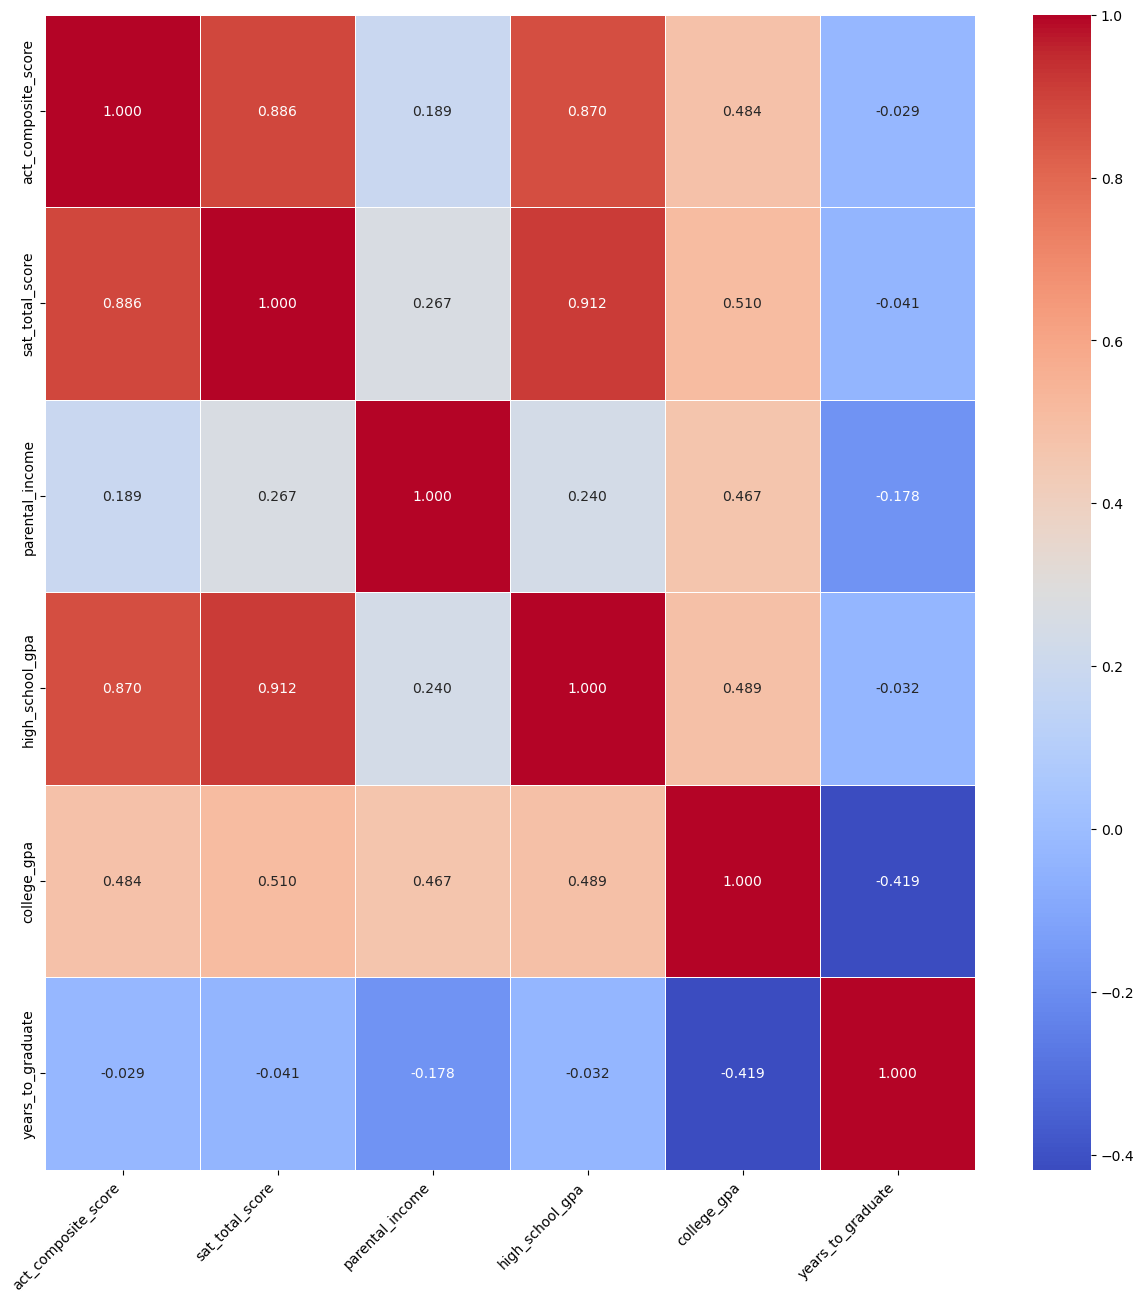

In [126]:
corr = data.corr()
"""colormap so (coolwarm or Spectral)
- intense blues are highly negative and 
- intense reds are highly positive
"""
plt.figure(figsize=(15,15))
colormap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, annot=True, cbar=True, linewidths=0.5, cmap=colormap, fmt=".3f",)
plt.xticks(rotation=45, horizontalalignment='right') 
plt.yticks(rotation=90, horizontalalignment='right') 
plt.show()

## Exploratory Data Analysis

### Analysing Target

Before we look at the data and charts, it is imperative that we do not take a peek at the holdout-set as our mind is a master as seeing patterns. So, it is always a good idea to to the split before we perform any EDA.

In [127]:
data.years_to_graduate.describe()

count    6000.000000
mean        4.991333
std         1.389213
min         3.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: years_to_graduate, dtype: float64

In [128]:
data[COLS_CATEGORICAL] = data[COLS_CATEGORICAL].astype('category')

In [129]:
graduate_threshold = 5
# create a new column called 'graduate_in_4years' that is set to Yes/1 if years_to_graduate is below the graduate_threshold
data['graduate_in_4years'] = ["Yes" if years < graduate_threshold else "No" for years in data['years_to_graduate']]

In [130]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [131]:
edu_labels = df_full_train.parental_level_of_education.unique()
print(edu_labels)

['some college', 'some high school', 'associates degree', 'bachelors degree', 'masters degree', 'high school']
Categories (6, object): ['associates degree', 'bachelors degree', 'high school', 'masters degree', 'some college', 'some high school']


In [132]:
df_full_train.parental_level_of_education.value_counts()

some college         1145
associates degree     971
high school           956
some high school      816
bachelors degree      604
masters degree        308
Name: parental_level_of_education, dtype: int64

In [183]:
# df_full_train.groupby('target').size()
df_full_train['graduate_in_4years'].value_counts(normalize=True)

0    0.5825
1    0.4175
Name: graduate_in_4years, dtype: float64

In [134]:
fig = px.bar(df_full_train['graduate_in_4years'].value_counts())
fig.show()

Definitely an imbalanced dataset.

### Target: pie chart

In [135]:
# df = pd.read_csv("covid-19-states-daily.csv")
# df['dateChecked'] = pd.to_datetime(df['dateChecked'])
# df = df[df['dateChecked'].dt.date.astype(str) == '2020-03-17']
# df = df[df['death']>=5]
# print (df)

# pie_chart = px.pie(
#         data_frame=df,
#         values='death',
#         names='state',
#         color='state',                      #differentiate markers (discrete) by color
#         color_discrete_sequence=["red","green","blue","orange"],     #set marker colors
#         # color_discrete_map={"WA":"yellow","CA":"red","NY":"black","FL":"brown"},
#         hover_name='negative',              #values appear in bold in the hover tooltip
#         # hover_data=['positive'],            #values appear as extra data in the hover tooltip
#         # custom_data=['total'],              #values are extra data to be used in Dash callbacks
#         labels={"state":"the State"},       #map the labels
#         title='Coronavirus in the USA',     #figure title
#         template='presentation',            #'ggplot2', 'seaborn', 'simple_white', 'plotly',
#                                             #'plotly_white', 'plotly_dark', 'presentation',
#                                             #'xgridoff', 'ygridoff', 'gridon', 'none'
#         width=800,                          #figure width in pixels
#         height=600,                         #figure height in pixels
#         hole=0.5,                           #represents the hole in middle of pie
#         )

# # pie_chart.update_traces(textposition='outside', textinfo='percent+label',
# #                         marker=dict(line=dict(color='#000000', width=4)),
# #                         pull=[0, 0, 0.2, 0], opacity=0.7, rotation=180)



# pio.show(pie_chart)

In [136]:

fig = px.pie(
    df_full_train, 
    values=df_full_train.graduate_in_4years.value_counts(), 
    names=TARGET_LABELS, 
    hole=.3, 
    title='Breakdown of target as percentage of the whole',
    width=800,   #figure width in pixels
    height=600, 
)
fig.show()

In [137]:
df_full_train.parental_level_of_education.nunique()

6

In [138]:
df_full_train.parental_level_of_education.value_counts()

some college         1145
associates degree     971
high school           956
some high school      816
bachelors degree      604
masters degree        308
Name: parental_level_of_education, dtype: int64

In [139]:
df_full_train.iloc[734]

act_composite_score                           27
sat_total_score                             2026
parental_level_of_education    associates degree
parental_income                            55399
high_school_gpa                              3.7
college_gpa                                  3.3
years_to_graduate                              5
graduate_in_4years                            No
Name: 92, dtype: object

In [140]:
# del numericals['years_to_graduate']

In [141]:
numericals.columns

Index(['act_composite_score', 'sat_total_score', 'parental_income',
       'high_school_gpa', 'college_gpa', 'years_to_graduate'],
      dtype='object')

### Correlation

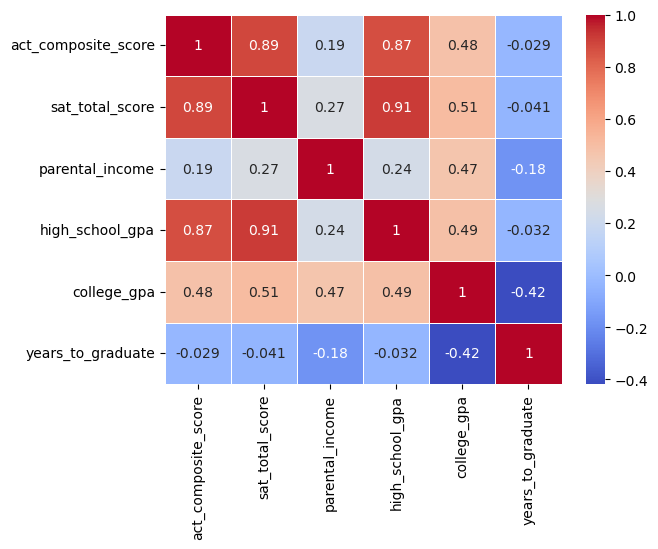

In [142]:
corr = numericals.corr()
"""colormap so (coolwarm or Spectral)
- intense blues are highly negative and 
- intense reds are highly positive
"""
colormap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, annot=True, cbar=True, linewidths=0.5, cmap=colormap);

### Mutual Information

In [ ]:
def mutual_info_target(series):
    return mutual_info_score(series, df_full_train.years_to_graduate)

In [ ]:
mi = df_full_train[categoricals].apply(mutual_info_target)
mi.sort_values(ascending=False)

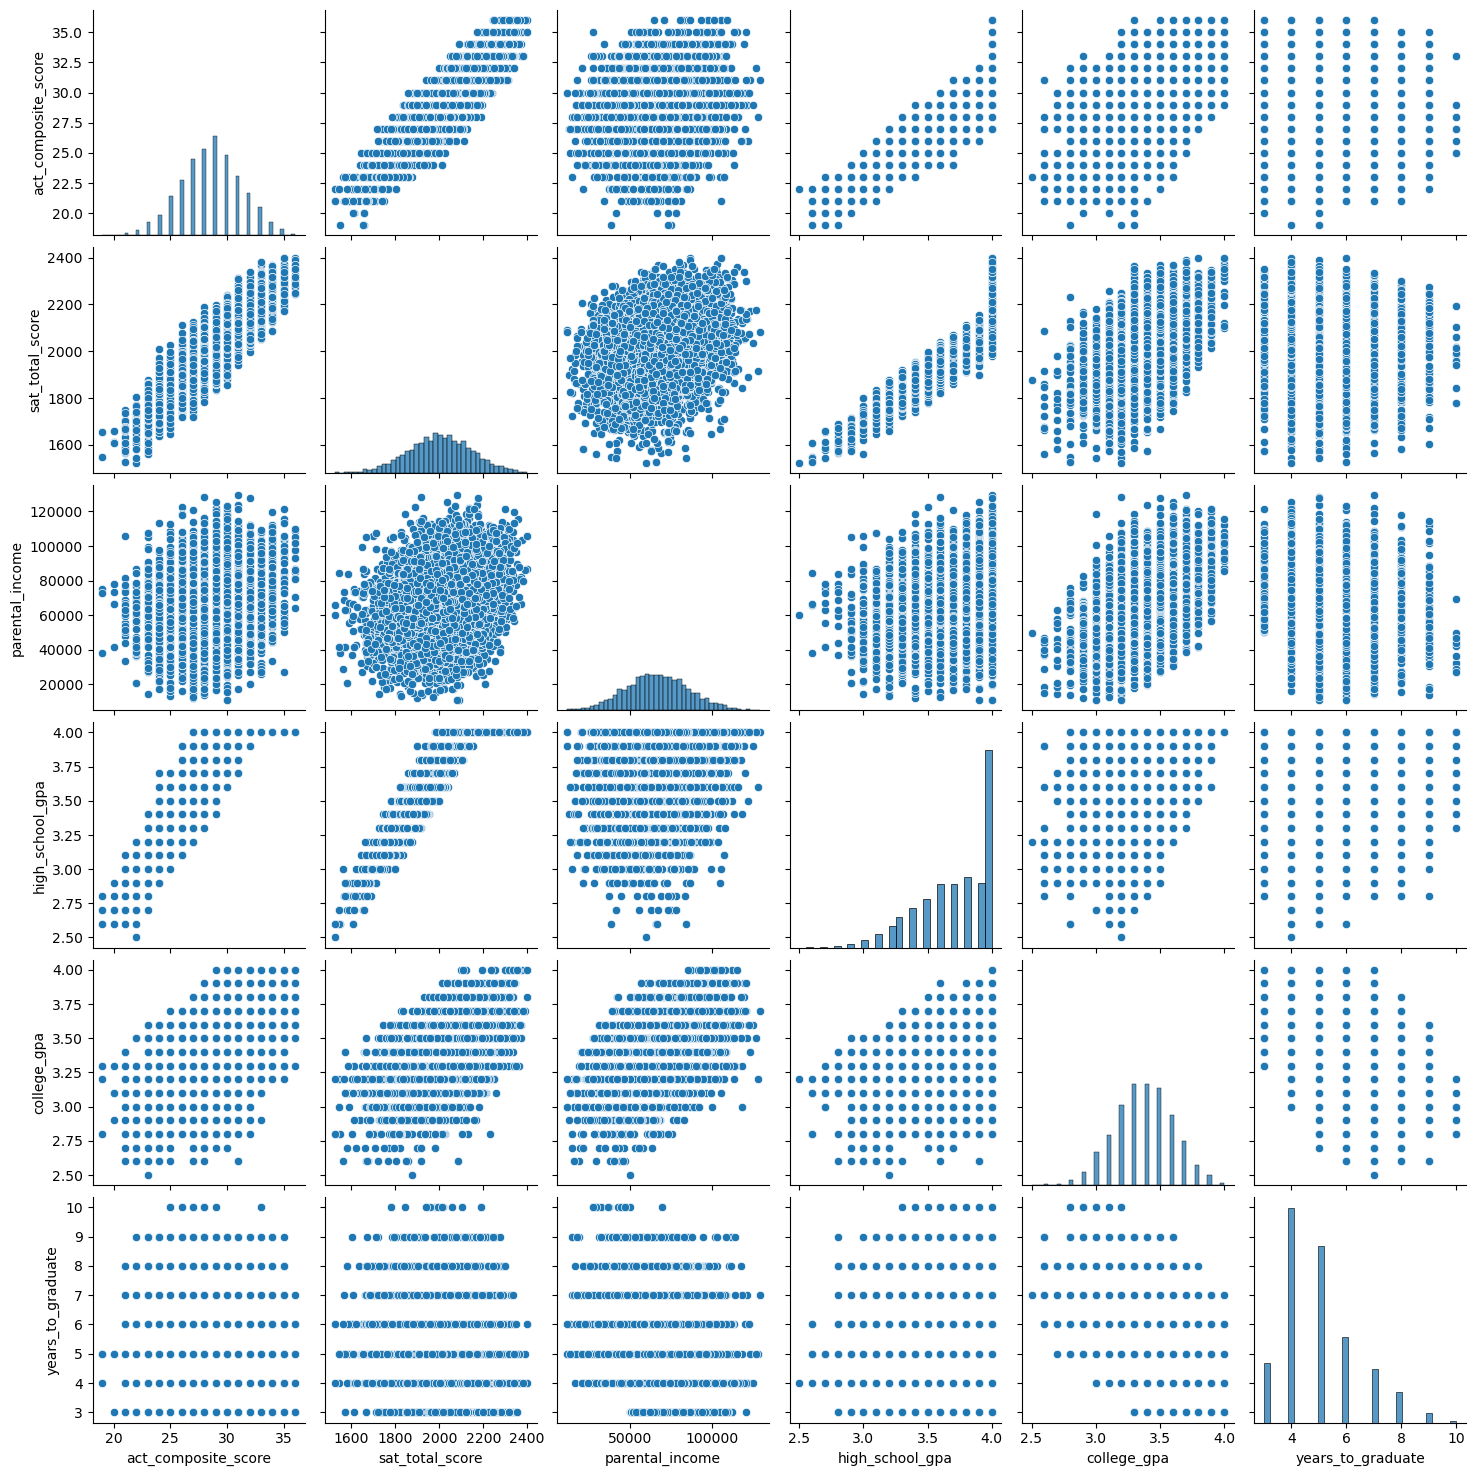

In [143]:
sns.pairplot(numericals);

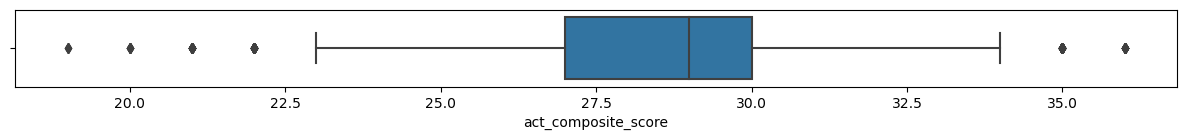

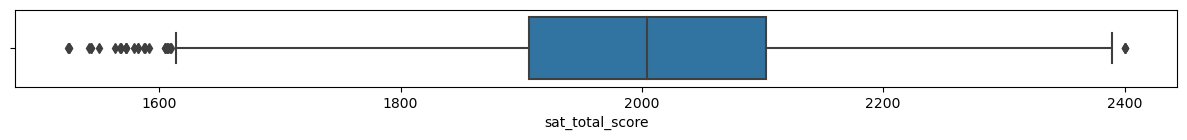

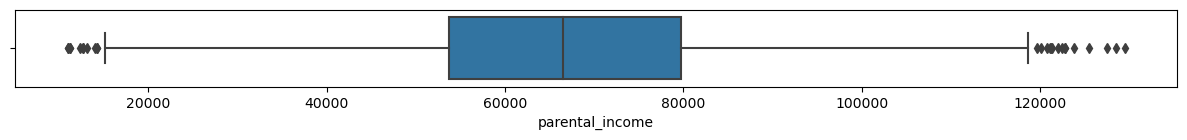

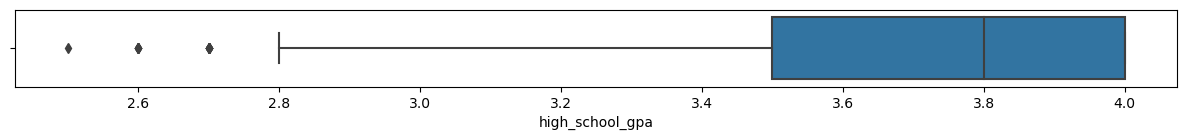

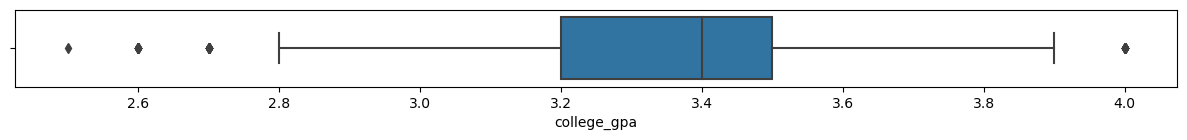

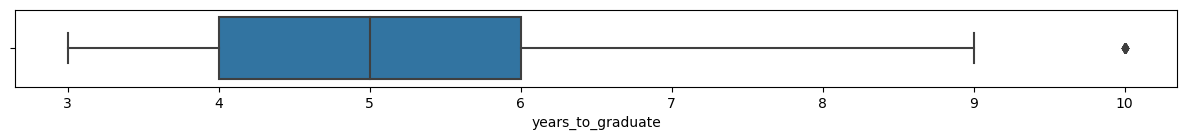

In [144]:
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()


Insights: some outliers we need to treat.

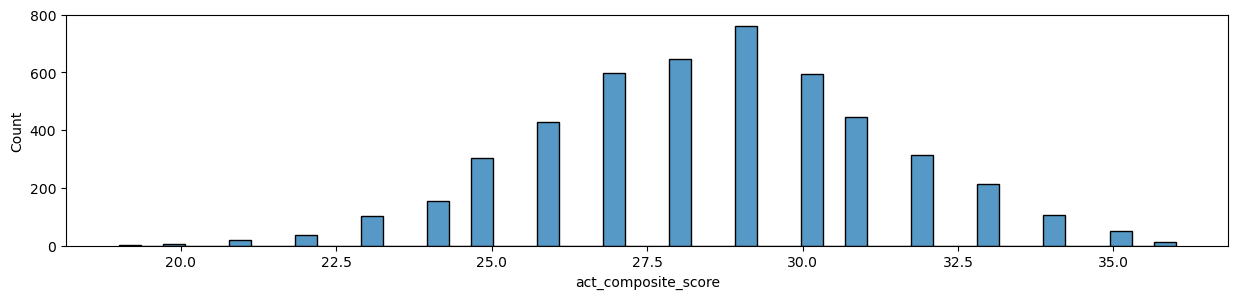

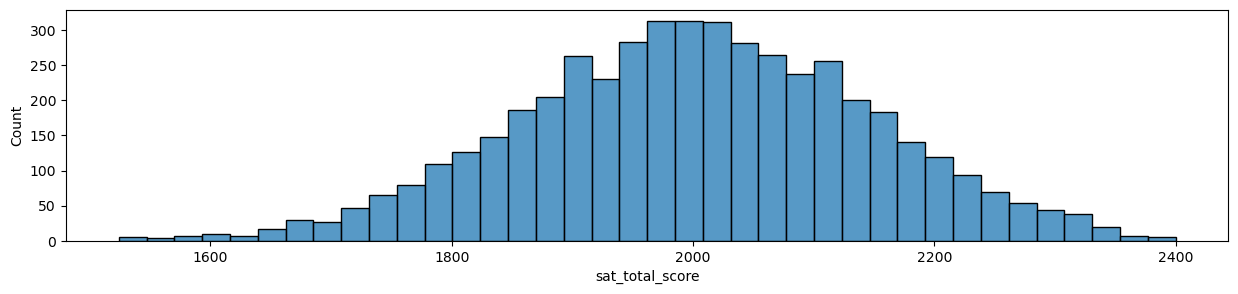

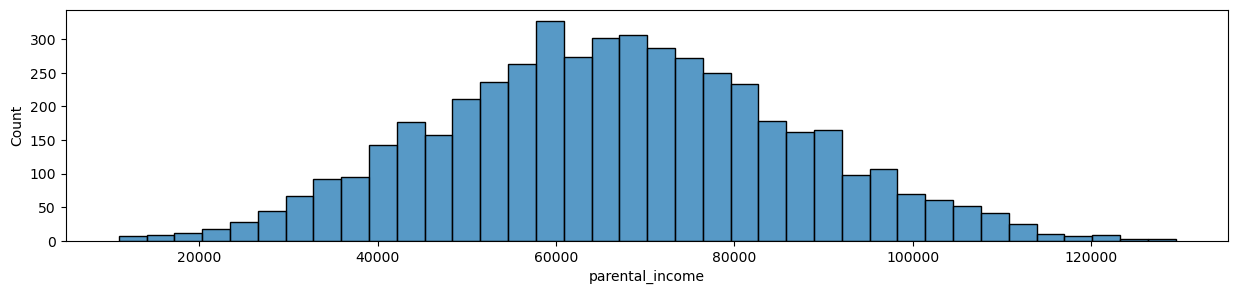

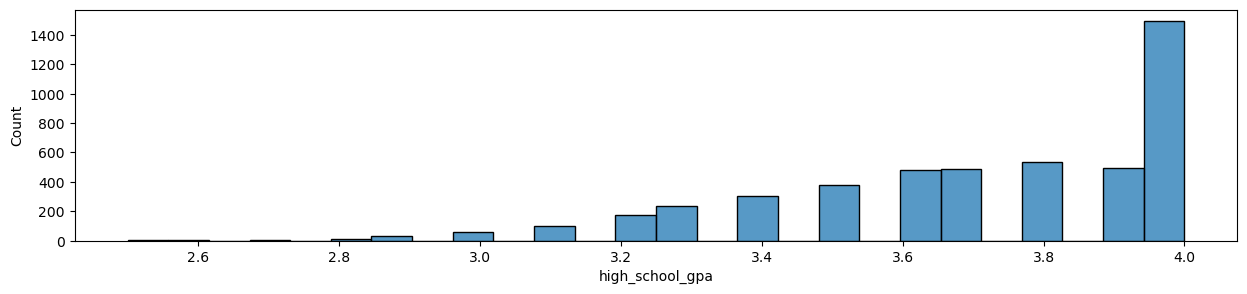

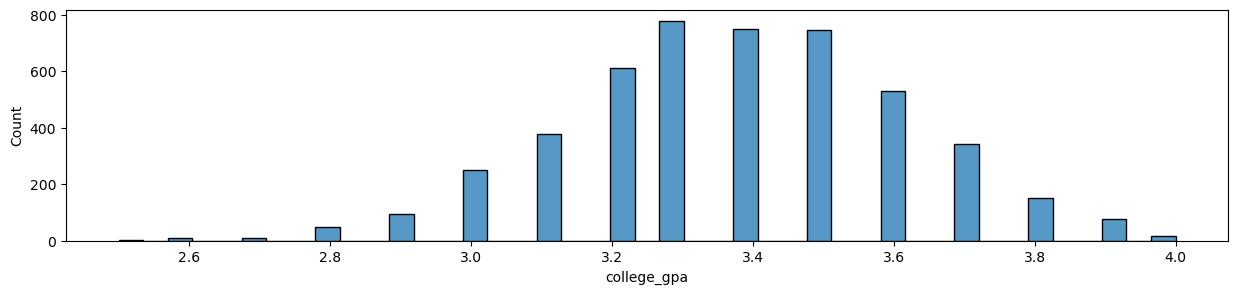

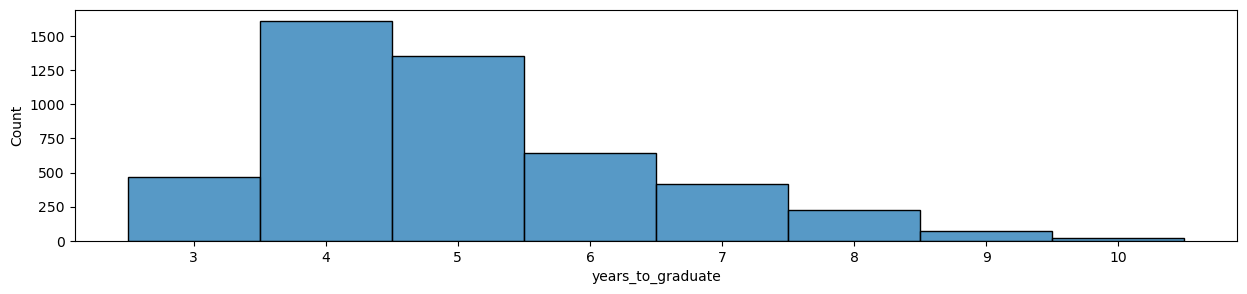

In [145]:
for column in COLS_NUMERICAL:
    plt.figure(figsize=(15,3))
    sns.histplot(data=df_full_train[COLS_NUMERICAL], x=column)

plt.show()

In [146]:
fig = px.histogram(df_full_train, 
                   x='parental_level_of_education', 
                   color='years_to_graduate', 
                   facet_col='graduate_in_4years',
                   opacity=0.45,
                   category_orders=dict(years_to_graduate=['3', '4', '5', '6', '7', '8', '9', '10']),
                   marginal='box',
                   title="Distribution of 'parents educational level' by 'years_to_graduate' across target")
fig.show()

In [147]:
fig = px.scatter(
    df_full_train, 
    x='high_school_gpa', 
    y='college_gpa', 
    # facet_col='graduate_in_4years',
    # opacity=0.45,
    # histfunc='count', 
    title="Comparison of 'high_school_gpa' against 'college_gpa'")
fig.show()

In [148]:
# fig = px.histogram(df_full_train, 
#                    x='age_at_enrollment', 
#                    color='target', 
#                    facet_col='gender', 
#                    opacity=0.65, 
#                    title='Distribution of age groups by gender across target')
# fig.show()

### Assumptions

Looking at above scatter-plot, gonna make assumptions as follows:

- 


### Insights

Some preliminary insights:

- 
- 
  

### Questions to guide further EDA for final feature selection, model selection and final report

Following questions, moved out to its own notebook for deeper dive on EDA. 

- 

### Out-of-scope

As important as doing the needful analyis, it is also important in knowing what to exclude; in context of project's purpose and objective, time and other constraints (availability of data and possible augmenting of data)



In [149]:
data[['parental_level_of_education', 'high_school_gpa', 'years_to_graduate']] = data[['parental_level_of_education', 'high_school_gpa', 'years_to_graduate']].astype('category')

# data['parental_level_of_education'] = data['parental_level_of_education'].map(EDUCATION_VALUES)


## BASELINE ML STARTS HERE

### import sklearn packages

In [150]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier
from catboost import CatBoostClassifier


### split dataset with train_test_split

do we want 
- 2 splits for train, test or 
- 3 splits for train, val and test?

reminder: 
- not yet stratify
- not scaled
- use cross-validation 
- save final df to file as processed_df.csv?

In [151]:
data = CSVDataLoader().load('data/graduation_rate.csv') 
data = Preprocessor().ColumnsSymbolReplacer(data)
data = Preprocessor().SymbolReplacer(data, 'parental_level_of_education')

Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 400.18it/s]

Finished processing the CSV file.


In [152]:
data

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,years_to_graduate
0,30,2109,some college,51851,4.0,3.3,5
1,23,1800,some high school,53302,3.0,3.2,8
2,28,2014,some college,55958,3.6,3.4,5
3,27,1972,high school,85871,3.6,3.5,6
4,26,1802,associates degree,57486,3.2,3.2,4
...,...,...,...,...,...,...,...
995,27,1879,some college,58335,3.4,3.1,6
996,31,2175,associates degree,34589,4.0,3.6,4
997,28,2051,associates degree,63883,3.8,3.7,7
998,28,2005,some college,74558,3.6,3.2,4


In [153]:

data = FeatureBuilder().TargetEncoder(data)

# target_names = data.target.unique()
# # data = Preprocessor().TargetImputer(data)
# print(f'{target_names = }')
# print(f'{TARGET_LABELS = }')

  -- Creating 'graduate_in_4years' column...


In [154]:
data.head(2).T

,0,1
act_composite_score,30,23
sat_total_score,2109,1800
parental_level_of_education,some college,some high school
parental_income,51851,53302
high_school_gpa,4.0,3.0
college_gpa,3.3,3.2
years_to_graduate,5,8
graduate_in_4years,0,0


In [155]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [156]:
df_full_train

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,years_to_graduate,graduate_in_4years
832,30,2112,some college,61175,4.0,3.2,5,0
797,28,1841,high school,53097,3.4,3.3,7,0
49,28,1985,associates degree,68736,3.7,3.2,4,1
867,26,1848,some high school,38496,3.5,3.2,5,0
514,30,2185,bachelors degree,79972,4.0,3.5,4,1
...,...,...,...,...,...,...,...,...
337,26,1982,some college,81095,3.6,3.4,4,1
91,29,2097,some college,33774,4.0,3.1,6,0
80,31,2221,bachelors degree,81557,4.0,3.6,8,0
703,24,2011,some college,61786,3.7,3.6,3,1


In [157]:
y_train = df_train.graduate_in_4years.values
y_val = df_val.graduate_in_4years.values
y_test = df_test.graduate_in_4years.values
# print(len(y_train), len(y_val), len(y_test))
print(y_train.shape, y_val.shape, y_test.shape)
print(y_train[:5])

(600,) (200,) (200,)
[1 0 0 0 1]


In [158]:
df_train = df_train.drop(['years_to_graduate', 'graduate_in_4years'], axis=1).reset_index(drop=True)
df_val = df_val.drop(['years_to_graduate', 'graduate_in_4years'], axis=1).reset_index(drop=True)
df_test = df_test.drop(['years_to_graduate', 'graduate_in_4years'], axis=1).reset_index(drop=True)
# print(len(df_train), len(df_val), len(df_test))
print(df_train.shape, df_val.shape, df_test.shape)

(600, 6) (200, 6) (200, 6)


In [159]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(val_dicts)

### LogisticRegression

In [160]:
scores = []

In [161]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('train auc:', roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1]))    

y_pred_prob = lr.predict_proba(X_val)[:, 1]
# Threshold the predicted probabilities at 0.5
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
print('val auc:', roc_auc_score(y_val, y_pred_prob))

train auc: 0.6168797953964194
val auc: 0.5805000523067266


In [162]:
scores.append({"model": "LogisticRegression", 
               "auc": roc_auc_score(y_val, y_pred),
               "accuracy": accuracy_score(y_val, y_pred),
               "precision": precision_score(y_val, y_pred), # labels=TARGET_LABELS, 
               "f1_mean": f1_score(y_val, y_pred),
               "recall": recall_score(y_val, y_pred),
               }
    )

pprint(scores, indent=4)

[   {   'accuracy': 0.56,
        'auc': 0.4957631551417513,
        'f1_mean': 0.2542372881355932,
        'model': 'LogisticRegression',
        'precision': 0.38461538461538464,
        'recall': 0.189873417721519}]


### DecisionTreeClassifier

In [163]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('train auc:', roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1]))    

y_pred_prob = dt.predict_proba(X_val)[:, 1]
# Threshold the predicted probabilities at 0.5
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
print('val auc:', roc_auc_score(y_val, y_pred_prob))

train auc: 1.0
val auc: 0.6418558426613662


In [164]:
scores.append({"model": "DecisionTreeClassifier", 
               "auc": roc_auc_score(y_val, y_pred),
               "accuracy": accuracy_score(y_val, y_pred),
               "precision": precision_score(y_val, y_pred), # labels=TARGET_LABELS, 
               "f1_mean": f1_score(y_val, y_pred),
               "recall": recall_score(y_val, y_pred),
               }
    )

pprint(scores, indent=4)

[   {   'accuracy': 0.56,
        'auc': 0.4957631551417513,
        'f1_mean': 0.2542372881355932,
        'model': 'LogisticRegression',
        'precision': 0.38461538461538464,
        'recall': 0.189873417721519},
    {   'accuracy': 0.665,
        'auc': 0.6418558426613662,
        'f1_mean': 0.5562913907284769,
        'model': 'DecisionTreeClassifier',
        'precision': 0.5833333333333334,
        'recall': 0.5316455696202531}]


In [165]:
from sklearn.tree import export_text
# print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

### RandomForestClassifier

In [166]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('train auc:', roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))    

y_pred_prob = rf.predict_proba(X_val)[:, 1]
# Threshold the predicted probabilities at 0.5
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
print('val auc:', roc_auc_score(y_val, y_pred_prob))

train auc: 1.0
val auc: 0.7869547023747253


In [167]:
scores.append({"model": "RandomForestClassifier", 
               "auc": roc_auc_score(y_val, y_pred),
               "accuracy": accuracy_score(y_val, y_pred),
               "precision": precision_score(y_val, y_pred), # labels=TARGET_LABELS, 
               "f1_mean": f1_score(y_val, y_pred),
               "recall": recall_score(y_val, y_pred),
               }
    )

pprint(scores, indent=4)

[   {   'accuracy': 0.56,
        'auc': 0.4957631551417513,
        'f1_mean': 0.2542372881355932,
        'model': 'LogisticRegression',
        'precision': 0.38461538461538464,
        'recall': 0.189873417721519},
    {   'accuracy': 0.665,
        'auc': 0.6418558426613662,
        'f1_mean': 0.5562913907284769,
        'model': 'DecisionTreeClassifier',
        'precision': 0.5833333333333334,
        'recall': 0.5316455696202531},
    {   'accuracy': 0.73,
        'auc': 0.7175436761167486,
        'f1_mean': 0.6582278481012658,
        'model': 'RandomForestClassifier',
        'precision': 0.6582278481012658,
        'recall': 0.6582278481012658}]


### xgboost

In [168]:
# features = dv.feature_names_
# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
# dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('train auc:', roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1]))    

y_pred_prob = xgb.predict_proba(X_val)[:, 1]
# Threshold the predicted probabilities at 0.5
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
print('val auc:', roc_auc_score(y_val, y_pred_prob))

train auc: 1.0
val auc: 0.7772779579453918


In [169]:
# xgb_params = {
#     'eta': 0.3, 
#     'max_depth': 6,
#     'min_child_weight': 1,
    
#     'objective': 'binary:logistic',
#     'nthread': 8,
    
#     'seed': 1,
#     'verbosity': 1,
# }

# xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [170]:
scores.append({"model": "XGBClassifier", 
               "auc": roc_auc_score(y_val, y_pred),
               "accuracy": accuracy_score(y_val, y_pred),
               "precision": precision_score(y_val, y_pred, labels=TARGET_LABELS,  pos_label=1),
               "f1_mean": f1_score(y_val, y_pred, average='weighted'),
               "recall": recall_score(y_val, y_pred, pos_label=1),
               }
    )

pprint(scores, indent=4)

[   {   'accuracy': 0.56,
        'auc': 0.4957631551417513,
        'f1_mean': 0.2542372881355932,
        'model': 'LogisticRegression',
        'precision': 0.38461538461538464,
        'recall': 0.189873417721519},
    {   'accuracy': 0.665,
        'auc': 0.6418558426613662,
        'f1_mean': 0.5562913907284769,
        'model': 'DecisionTreeClassifier',
        'precision': 0.5833333333333334,
        'recall': 0.5316455696202531},
    {   'accuracy': 0.73,
        'auc': 0.7175436761167486,
        'f1_mean': 0.6582278481012658,
        'model': 'RandomForestClassifier',
        'precision': 0.6582278481012658,
        'recall': 0.6582278481012658},
    {   'accuracy': 0.68,
        'auc': 0.6652369494717021,
        'f1_mean': 0.68,
        'model': 'XGBClassifier',
        'precision': 0.5949367088607594,
        'recall': 0.5949367088607594}]


### catboost

In [171]:
# cat_columns = list(df_full_train.select_dtypes(exclude=['int64','float64']).columns)

model = CatBoostClassifier(random_seed=RANDOM_SEED)

model.fit(X_train, y_train, verbose=False) # cat_features=cat_columns,
y_pred1 = model.predict_proba(X_test)[:,1]
# Threshold the predicted probabilities at 0.5
y_pred = np.where(y_pred1 >= 0.5, 1, 0)


print('AUC (CatBoost):', roc_auc_score(y_val, y_pred))  
print('Accuracy Score (CatBoost):', accuracy_score(y_val, y_pred))
print('F1 Score (CatBoost):', f1_score(y_val, y_pred))

AUC (CatBoost): 0.751647661889319
Accuracy Score (CatBoost): 0.75
F1 Score (CatBoost): 0.7058823529411765


In [172]:
scores.append({"model": "CatBoostClassifier", 
               "auc": roc_auc_score(y_val, y_pred),
               "accuracy": accuracy_score(y_val, y_pred),
               "precision": precision_score(y_val, y_pred, labels=TARGET_LABELS,  pos_label=1),
               "f1_mean": f1_score(y_val, y_pred, average='weighted'),
               "recall": recall_score(y_val, y_pred, pos_label=1),
               }
    )
pprint(scores)

[{'accuracy': 0.56,
  'auc': 0.4957631551417513,
  'f1_mean': 0.2542372881355932,
  'model': 'LogisticRegression',
  'precision': 0.38461538461538464,
  'recall': 0.189873417721519},
 {'accuracy': 0.665,
  'auc': 0.6418558426613662,
  'f1_mean': 0.5562913907284769,
  'model': 'DecisionTreeClassifier',
  'precision': 0.5833333333333334,
  'recall': 0.5316455696202531},
 {'accuracy': 0.73,
  'auc': 0.7175436761167486,
  'f1_mean': 0.6582278481012658,
  'model': 'RandomForestClassifier',
  'precision': 0.6582278481012658,
  'recall': 0.6582278481012658},
 {'accuracy': 0.68,
  'auc': 0.6652369494717021,
  'f1_mean': 0.68,
  'model': 'XGBClassifier',
  'precision': 0.5949367088607594,
  'recall': 0.5949367088607594},
 {'accuracy': 0.75,
  'auc': 0.751647661889319,
  'f1_mean': 0.7523017902813299,
  'model': 'CatBoostClassifier',
  'precision': 0.6593406593406593,
  'recall': 0.759493670886076}]


### model evaluation

In [173]:
print(f"Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment")
base_scores_df = pd.DataFrame(scores).sort_values(by='auc', ascending=False)
base_scores_df

Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment


,model,auc,accuracy,precision,f1_mean,recall
4,CatBoostClassifier,0.751648,0.750,0.659341,0.752302,0.759494
2,RandomForestClassifier,0.717544,0.730,0.658228,0.658228,0.658228
3,XGBClassifier,0.665237,0.680,0.594937,0.680000,0.594937
1,DecisionTreeClassifier,0.641856,0.665,0.583333,0.556291,0.531646
0,LogisticRegression,0.495763,0.560,0.384615,0.254237,0.189873


In [174]:
output_file = Path('baseline_scores.csv')
print(output_file)
if output_file.exists():
   print(f'{output_file} exists, not overwritten.')
else:
   base_scores_df.to_csv(output_file, index=False, header=True, mode='w')

baseline_scores.csv
baseline_scores.csv exists, not overwritten.


### looping

In [179]:
classifiers = {
    'logistic': LogisticRegression()
    , 'logisticCV': LogisticRegressionCV()
    , 'decision_tree': DecisionTreeClassifier()
    , 'random_forest': RandomForestClassifier()
    , 'grad_boost': GradientBoostingClassifier()
    , 'knn': KNeighborsClassifier() 
    , 'xgboost': XGBClassifier()
    , 'catboost': CatBoostClassifier(verbose=False)
}

scores_loop = []

In [180]:
# Train and predict each classifier in the pipeline
for name, classifier in classifiers.items():
    print(f"TRAIN loop: {name}, {classifier}")
    model = classifier
    model.fit(X_train, y_train)
    
    y_train_proba = model.predict_proba(X_train)[:,1]
    y_val_proba = model.predict_proba(X_val)[:,1]
    
    # Threshold the predicted probabilities at 0.5
    y_train_pred = np.where(y_train_proba >= 0.5, 1, 0)
    y_val_pred = np.where(y_val_proba >= 0.5, 1, 0)
    print()
    
    print(f'Scores for Training')
    print(f'AUC : {roc_auc_score(y_train, y_train_pred):.4f}') 
    print(f'Accuracy : {accuracy_score(y_train, y_train_pred):.4f}')
    print(f'F1 Score : {f1_score(y_train, y_train_pred):.4f}')

    print('----------------------------------')
    
    print(f"EVALUATE loop: {name}, {classifier}")
    print(f'Scores for Prediction')
    print(f'AUC : {roc_auc_score(y_val, y_val_pred):.4f}') 
    print(f'Accuracy : {accuracy_score(y_val, y_val_pred):.4f}')
    print(f'F1 Score : {f1_score(y_val, y_val_pred):.4f}')
    
    scores_loop.append(
        {   "name": name,
            "model" : classifier, 
            "auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
    )
    # confusion_matrix(y_val, y_val_pred)
    print()
    # classification_report(y_val, y_val_pred)
    print()
    print('--------------------------------------------------')
    print()


TRAIN loop: logistic, LogisticRegression()

Scores for Training
AUC : 0.5324
Accuracy : 0.5717
F1 Score : 0.3494
----------------------------------
EVALUATE loop: logistic, LogisticRegression()
Scores for Prediction
AUC : 0.4958
Accuracy : 0.5600
F1 Score : 0.2542


--------------------------------------------------

TRAIN loop: decision_tree, DecisionTreeClassifier()

Scores for Training
AUC : 1.0000
Accuracy : 1.0000
F1 Score : 1.0000
----------------------------------
EVALUATE loop: decision_tree, DecisionTreeClassifier()
Scores for Prediction
AUC : 0.6355
Accuracy : 0.6600
F1 Score : 0.5467


--------------------------------------------------

TRAIN loop: random_forest, RandomForestClassifier()

Scores for Training
AUC : 1.0000
Accuracy : 1.0000
F1 Score : 1.0000
----------------------------------
EVALUATE loop: random_forest, RandomForestClassifier()
Scores for Prediction
AUC : 0.6966
Accuracy : 0.7100
F1 Score : 0.6329


--------------------------------------------------

TRAIN l

Insights:
- the tree-based models are overfitting, looking at the TRAIN scores = 1.0, because in using defaults, the `max_depth` and `early_stopping_rounds` were not specified
- Logistic Regression performs the **worst** out of all listed models 
- Gradient Boosting Classifier performs the **best** out of all listed models 

In [181]:
print(f"Looping code. Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment")
scores_loop_df = pd.DataFrame(scores_loop).sort_values(by='auc', ascending=False)
scores_loop_df

Looping code. Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment


,name,model,auc,accuracy,precision,f1_mean,recall
3,grad_boost,([DecisionTreeRegressor(criterion='friedman_ms...,0.7577,0.760,0.6782,0.7108,0.7468
6,catboost,<catboost.core.CatBoostClassifier object at 0x...,0.7453,0.745,0.6556,0.6982,0.7468
2,random_forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.6966,0.710,0.6329,0.6329,0.6329
5,xgboost,"XGBClassifier(base_score=None, booster=None, c...",0.6652,0.680,0.5949,0.5949,0.5949
1,decision_tree,DecisionTreeClassifier(),0.6355,0.660,0.5775,0.5467,0.5190
4,knn,KNeighborsClassifier(),0.5818,0.595,0.4881,0.5031,0.5190
0,logistic,LogisticRegression(),0.4958,0.560,0.3846,0.2542,0.1899


Now that we've worked on a script to loop through our models, we can work on 

1. tuning the parameters,
1. introduce pipelines to 
   - treating the outliers,
   - scaling the data
   - drop columns that has high correlation or mutual info scores

In [182]:
output_file = Path('baseline_loop_scores.csv')
print(output_file)
if output_file.exists():
   print(f'{output_file} exists, not overwritten.')
else:
   scores_loop_df.to_csv(output_file, index=False, header=True, mode='w')


baseline_loop_scores.csv


In [185]:
import pickle

output_file = 'model.bin'
with open(output_file, 'wb') as f_out: 
    pickle.dump(model, f_out)
    
output_file = 'dv.bin'
with open(output_file, 'wb') as f_out: 
    pickle.dump(dv, f_out)

In [ ]:
def load(input_file):
    with open(input_file, 'rb') as f_in: 
        return pickle.load(f_in)

dv = load(f'dv.bin')
model = load(f'model.bin')

## Hyperparameters Tuning

In [ ]:
params={
    "Logistic Regression":{
        'warm_start': True,
        'n_jobs': -1,
        'penalty': PENALTY,
        'C': C,
        'solver': SOLVER,
        'max_iter': MAX_ITER,
    },                
    "Decision Tree": {
        'random_state': RANDOM_STATE,
        'criterion': CRITERION,
        'splitter':['best', 'random'],
        'max_depth': MAX_DEPTH,
        'min_samples_split': MIN_SAMPLES_SPLIT,        
        'min_samples_leaf': MIN_SAMPLES_LEAF,
        'max_features': [None, 'auto', 'sqrt', 'log2'],
        'class_weight': WEIGHTS
    },
    "Random Forest":{
        'random_state': RANDOM_STATE,
        'n_jobs': -1,
        'warm_start': True, 
        'n_estimators': N_ESTIMATORS,
        'criterion': CRITERION,
        'max_depth': MAX_DEPTH,
        'max_features': MAX_FEATURES,
        'min_samples_split': MIN_SAMPLES_SPLIT,        
        'min_samples_leaf': MIN_SAMPLES_LEAF,
        'class_weight': WEIGHTS       
    },
    "Gradient Boosting":{
        'random_state': RANDOM_STATE,
        'warm_start': True,
        'loss': ['log_loss', 'exponential'],
        'learning_rate':LEARNING_RATE,
        'n_estimators': N_ESTIMATORS,
        'subsample':[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
        'criterion':['squared_error', 'friedman_mse'],
        'max_depth': MAX_DEPTH,
        'max_features': MAX_FEATURES,
        'min_samples_split': MIN_SAMPLES_SPLIT,        
        'min_samples_leaf': MIN_SAMPLES_LEAF,
        
    },
    "XGBClassifier":{
        'seed': RANDOM_SEED,
        'device': cuda,
        'objective': 'binary:logistic',
        'nthread': 8,
        'eval_metric': auc        
        'eta':LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS,
        'min_child_weight': MIN_SAMPLES_LEAF,
    },
    "CatBoost":{
        'random_seed': RANDOM_SEED,
        'depth': MAX_DEPTH,
        'learning_rate': LEARNING_RATE,
        'iterations': N_ESTIMATORS,
        'class_weights': WEIGHTS 
    }              
}

In [ ]:
import time
start = time.time()
print("GPU Training Time: %s seconds" % (str(time.time() - start)))

In [ ]:
clf = GridSearchCV(
    model,
    {"max_depth": [2, 4, 6], "n_estimators": [50, 100, 200]},
    verbose=1,
    n_jobs=2,
)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)